# Tutorial 4  for JetSeT v.1.1.2

# Model fitting 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
import jetset
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
test_SEDs

['/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_3C345.ecsv',
 '/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421_EBL_DEABS.ecsv',
 '/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk501_EBL_DEABS.ecsv']

## loading data



In [3]:
data=Data.from_file(test_SEDs[2])


In [4]:
data.table

x,dx,y,dy,T_start,T_stop,UL,data_set
Hz,Hz,erg / (cm2 s),erg / (cm2 s),MJD,MJD,,
float64,float64,float64,float64,float64,float64,bool,bytes16
2299540000.0,0.0,3.6892e-14,2.668e-15,0.0,0.0,False,0.0
2639697000.0,0.0,4.12456e-14,9.712535e-26,0.0,0.0,False,0.0
4799040000.0,0.0,7.0368e-14,4.8e-16,0.0,0.0,False,0.0
4805039000.0,0.0,5.435586e-14,5.435586e-15,0.0,0.0,False,0.0
4805039000.0,0.0,3.239547e-14,3.239547e-15,0.0,0.0,False,0.0
4843552000.0,0.0,7.174767e-14,7.333333e-26,0.0,0.0,False,0.0
4999750000.0,0.0,8e-14,3.344772e-15,0.0,0.0,False,0.0
7698460000.0,0.0,1.15577e-13,6.16e-16,0.0,0.0,False,0.0



***  binning data  ***
---> N bins= 90
---> bin_widht= 0.2



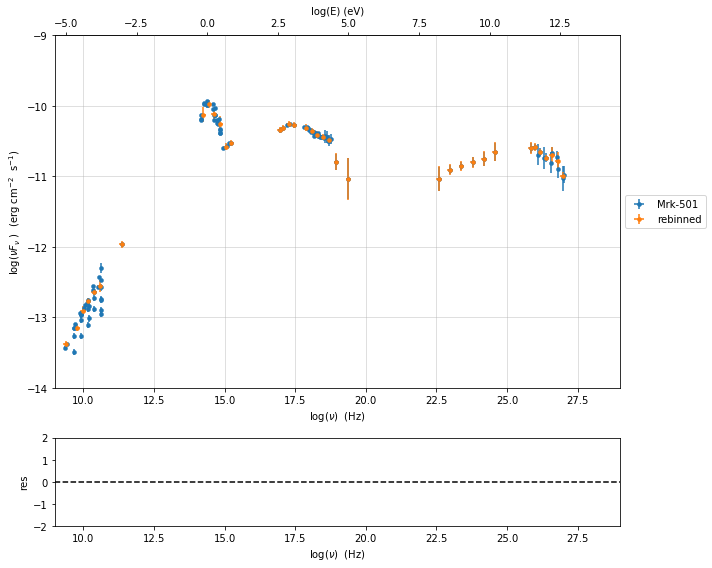

In [5]:
%matplotlib inline
sed_data=ObsData(data_table=data)
myPlot=sed_data.plot_sed()

sed_data.group_data(bin_width=0.2)
sed_data.add_systematics(0.1,[10.**6,10.**29])
myPlot.add_data_plot(sed_data,label='rebinned')
myPlot.rescale(y_min=-14,y_max=-9,x_min=9,x_max=29)

In [6]:
sed_data.table

nu_data,dnu_data,nuFnu_data,dnuFnu_data,nu_data_log,dnu_data_log,nuFnu_data_log,dnuFnu_data_log,dnuFnu_facke,dnuFnu_facke_log,UL,zero_error,T_start,T_stop,data_set
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,float64,float64,bytes16
2347263231.564593,540477332.6333663,4.124559999999995e-14,4.1245599999999946e-15,9.370561795864282,0.1,-13.384622374329622,0.043429448190325175,8.249119999999989e-15,0.2,False,False,0.0,0.0,0.0
5965354674.842971,1373573674.871577,7.174766999999987e-14,7.174766999999988e-15,9.7756362700932,0.1,-13.144192198044472,0.04342944819032519,1.4349533999999977e-14,0.2,False,False,0.0,0.0,0.0
9509846505.090975,2189723079.9284005,1.2257712070025038e-13,1.933421242541737e-14,9.978173507207659,0.1,-12.911590584311037,0.06850170505177235,2.4515424140050076e-14,0.2,False,False,0.0,0.0,0.0
15160402939.959587,3490811781.3334055,1.7286399999999977e-13,1.7286399999999977e-14,10.180710744322118,0.1,-12.762295441828662,0.04342944819032518,3.4572799999999955e-14,0.2,False,False,0.0,0.0,0.0
24168404524.604527,5564980797.980423,2.286560000000002e-13,2.2865600000000024e-14,10.383247981436577,0.1,-12.640817398120154,0.043429448190325175,4.573120000000005e-14,0.2,False,False,0.0,0.0,0.0
38528776548.89571,8871578653.278585,2.808997324911027e-13,5.387881989554782e-14,10.585785218551036,0.1,-12.551448674389356,0.08330116217834671,5.6179946498220545e-14,0.2,False,False,0.0,0.0,0.0
224991099999.99973,51806115291.63321,1.083e-12,1.1903603252358548e-13,11.352165339012089,0.1,-11.96537154337468,0.04773471105507773,2.166e-13,0.2,False,False,0.0,0.0,0.0
170394466308232.7,39234775805001.28,7.547087036820695e-11,1.7911369264245145e-11,14.231455486611301,0.1,-10.12222064147634,0.10307034749754382,1.509417407364139e-11,0.2,False,False,0.0,0.0,0.0
271639375734326.1,62547277723606.78,1.0761876832189412e-10,1.3796481238202604e-11,14.43399272372576,0.1,-9.968111982685974,0.05567556444719287,2.1523753664378823e-11,0.2,False,False,0.0,0.0,0.0


## phenomenological model constraining

### spectral indices


*** evaluating spectral indices for data ***



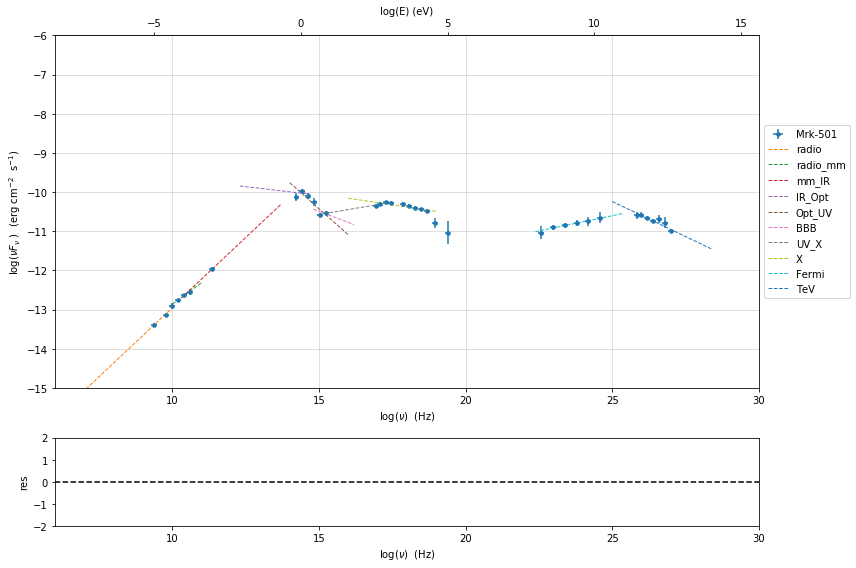

In [7]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(silent=True)
p=my_shape.plot_indices()
p.rescale(y_min=-15,y_max=-6)

### sed shaper

In [8]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=True,
                  Ep_start=None,
                  minimizer='lsb',
                  silent=True,
                  fit_range=[10,21])


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 21]
---> class:  HSP

---> class:  HSP


 model name     name      bestfit val     err +     err -   start val   fit range min fit range max frozen
----------- ------------ ------------- ------------ ----- ------------- ------------- ------------- ------
   LogCubic            b -6.411217e-02 7.838546e-03    -- -4.778766e-02 -1.000000e+01  0.000000e+00  False
   LogCubic            c -1.751422e-03 1.126990e-03    --  3.576198e-03 -1.000000e+01  1.000000e+01  False
   LogCubic           Ep  1.703731e+01 9.436687e-02    --  1.626870e+01  0.000000e+00  3.000000e+01  False
   LogCubic           Sp -1.030067e+01 1.884174e-02    -- -1.025412e+01 -3.000000e+01  0.000000e+00  False
host_galaxy nuFnu_p_host -1.006565e+01 5.462928e-02    -- -1.025412e+01 -1.225412e+01 -8.254123e+00  False
host_galaxy     nu_scale  1.730764e-02 3.695276e-03    --  0.000000e+00 -5.000000e-01  5.000000e-01  False

In [9]:
best_fit.show_report()


**************************************************************************************************
Fit report

Model: sync-shape-fit
 model name     name       par type       units          val      phys. bound. min phys. bound. max  log  frozen
----------- ------------ ------------ ------------- ------------- ---------------- ---------------- ----- ------
   LogCubic            b    curvature               -6.411217e-02    -1.000000e+01     0.000000e+00 False  False
   LogCubic            c third-degree               -1.751422e-03    -1.000000e+01     1.000000e+01 False  False
   LogCubic           Ep    peak freq            Hz  1.703731e+01     0.000000e+00     3.000000e+01  True  False
   LogCubic           Sp    peak flux erg / (cm2 s) -1.030067e+01    -3.000000e+01     0.000000e+00  True  False
host_galaxy nuFnu_p_host  nuFnu-scale erg / (cm2 s) -1.006565e+01    -2.000000e+01     2.000000e+01 False  False
host_galaxy     nu_scale     nu-scale            Hz  1.730764e-02    -2.000


*** Log-Polynomial fitting of the IC component ***
---> fit range: [23, 29]
---> LogCubic fit

**************************************************************************************************
Fit report

Model: IC-shape-fit
model name name   par type       units          val      phys. bound. min phys. bound. max  log  frozen
---------- ---- ------------ ------------- ------------- ---------------- ---------------- ----- ------
  LogCubic    b    curvature               -1.310993e-01    -1.000000e+01     0.000000e+00 False  False
  LogCubic    c third-degree               -3.300446e-02    -1.000000e+01     1.000000e+01 False  False
  LogCubic   Ep    peak freq            Hz  2.549603e+01     0.000000e+00     3.000000e+01  True  False
  LogCubic   Sp    peak flux erg / (cm2 s) -1.057945e+01    -3.000000e+01     0.000000e+00  True  False

converged=True
calls=55
------------------------------------------------------------------
| FCN = 1.997                   |      Ncalls=54 (54 tota

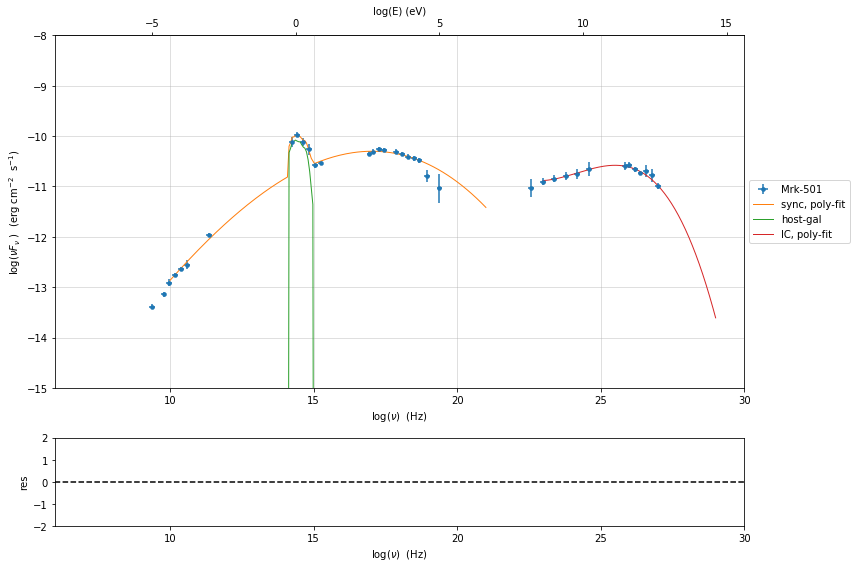

In [10]:
my_shape.IC_fit(fit_range=[23,29],minimizer='minuit')
p=my_shape.plot_shape_fit()
p.rescale(y_min=-15)

### model constraining

In [11]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='lppl',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E11,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False, silent=True)
prefit_jet.save_model('prefit_jet_gal_templ.dat')


***  constrains parameters from observable ***

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 1.057074e+02     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.642067e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.078420e+02     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.248787e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 3.205608e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 7.430949e+03     1.000000e+00     1.000000e+09 False  False
               R         region_size           

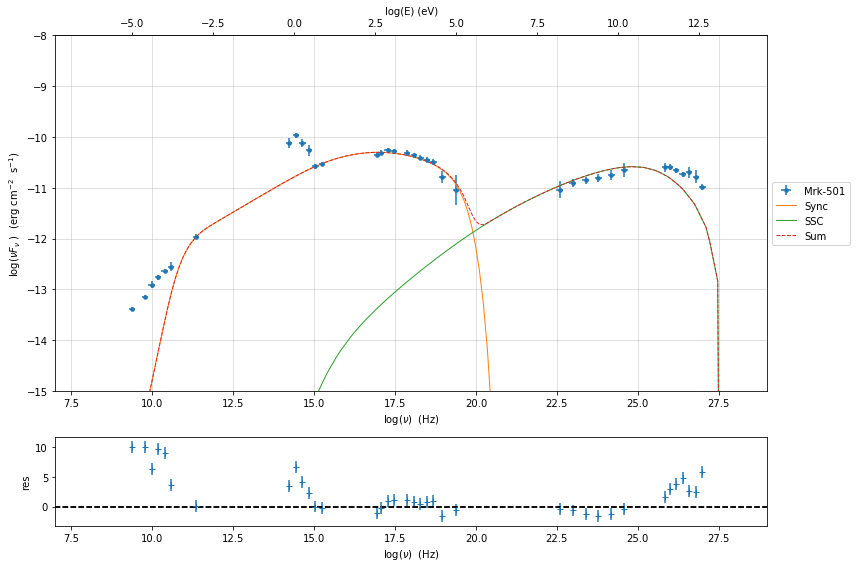

In [12]:
pl=prefit_jet.plot_model(sed_data=sed_data)
pl.add_residual_plot(prefit_jet,sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)

## Model fitting

### Model fitting with LSB

In [13]:
from jetset.minimizer import ModelMinimizer
from jetset.model_manager import  FitModel
from jetset.jet_model import Jet

jet_lsb=Jet.load_model('prefit_jet_gal_templ.dat')
jet_lsb.set_gamma_grid_size(200)

fit_model_lsb=FitModel( jet=jet_lsb, name='SSC-best-fit-lsb',template=my_shape.host_gal) 
fit_model_lsb.freeze(jet_lsb,'z_cosm')
fit_model_lsb.freeze(jet_lsb,'R_H')
fit_model_lsb.jet_leptonic.parameters.beam_obj.fit_range=[5,50]
fit_model_lsb.jet_leptonic.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_lsb.jet_leptonic.parameters.gmax.fit_range=[1E4,1E8]
fit_model_lsb.host_galaxy.parameters.nuFnu_p_host.frozen=False
fit_model_lsb.host_galaxy.parameters.nu_scale.frozen=True

model_minimizer_lsb=ModelMinimizer('lsb')
best_fit_lsb=model_minimizer_lsb.fit(fit_model_lsb,sed_data,1E11,1E29,fitname='SSC-best-fit-lsb',repeat=3)



      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 1.057074e+02     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.642067e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.078420e+02     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.248787e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 3.205608e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 7.430949e+03     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 5.486051e+15     1.000000e+03     1.000000e

In [14]:
best_fit_lsb.save_report()
best_fit_lsb.bestfit_table

model name,name,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
str12,str16,float64,float64,float64,float64,float64,float64,bool
jet_leptonic,gmin,9.794938e+01,1.703368e+02,--,1.057074e+02,1.000000e+00,1.000000e+09,False
jet_leptonic,gmax,1.787752e+06,6.639115e+00,--,1.642067e+06,1.000000e+04,1.000000e+08,False
jet_leptonic,N,4.793717e+01,1.036769e+02,--,1.078420e+02,0.000000e+00,--,False
jet_leptonic,s,2.218796e+00,5.177878e-02,--,2.248787e+00,-1.000000e+01,1.000000e+01,False
jet_leptonic,r,2.572628e-01,4.821181e-02,--,3.205608e-01,-1.500000e+01,1.500000e+01,False
jet_leptonic,gamma0_log_parab,8.551223e+03,5.730863e+03,--,7.430949e+03,1.000000e+00,1.000000e+09,False
jet_leptonic,R,8.768653e+15,1.113352e+16,--,5.486051e+15,3.162278e+15,3.162278e+17,False
jet_leptonic,R_H,--,--,--,1.000000e+17,0.000000e+00,--,True
jet_leptonic,B,1.687698e-02,7.406828e-03,--,1.000000e-01,0.000000e+00,--,False


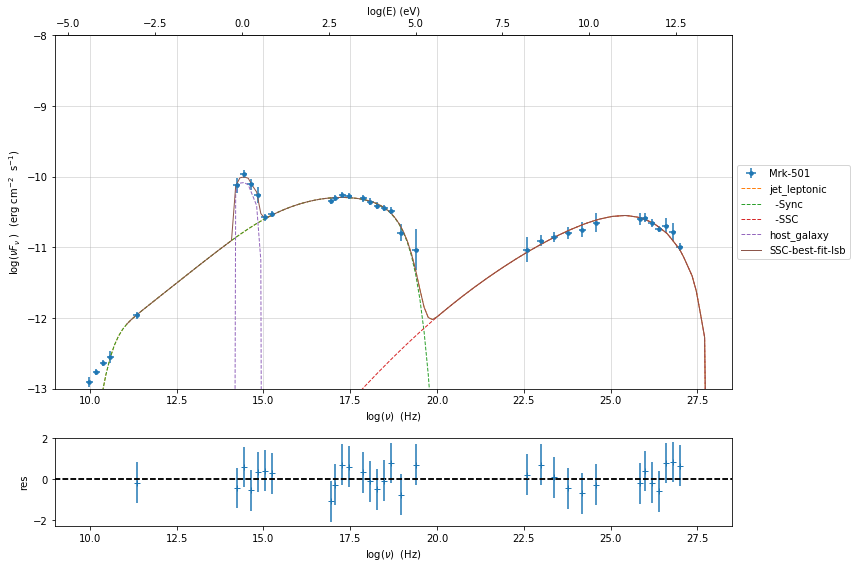

In [15]:
%matplotlib inline
fit_model_lsb.set_nu_grid(1E6,1E30,200)
fit_model_lsb.eval()
p2=fit_model_lsb.plot_model(sed_data=sed_data)
p2.rescale(y_min=-13,x_min=9,x_max=28.5)

### Model fitting with a bkn pl


In [16]:
from jetset.obs_constrain import ObsConstrain
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='bkn',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E11,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False,silent=True)
prefit_jet.save_model('prefit_jet_bkn_gal_templ.dat')


***  constrains parameters from observable ***

    name          par type           units          val      phys. bound. min phys. bound. max  log  frozen
----------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
       gmin  low-energy-cut-off lorentz-factor* 1.888576e+02     1.000000e+00     1.000000e+09 False  False
       gmax high-energy-cut-off lorentz-factor* 1.955819e+06     1.000000e+00     1.000000e+15 False  False
          N    emitters_density         1 / cm3 2.191551e+01     0.000000e+00               -- False  False
          p   LE_spectral_slope                 2.248787e+00    -1.000000e+01     1.000000e+01 False  False
        p_1   HE_spectral_slope                 3.500000e+00    -1.000000e+01     1.000000e+01 False  False
gamma_break    turn-over-energy lorentz-factor* 1.971472e+05     1.000000e+00     1.000000e+09 False  False
          R         region_size              cm 1.045823e+16     1.000000e+03     1.000

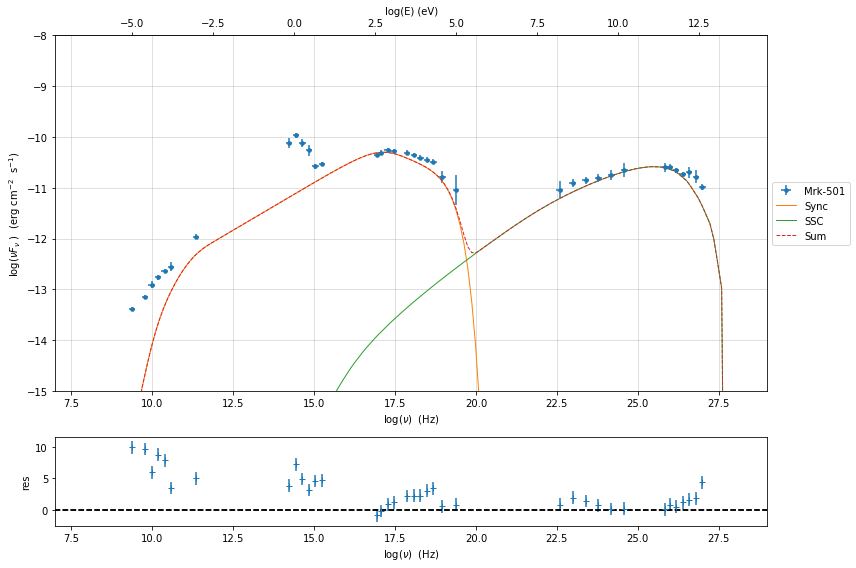

In [17]:
prefit_jet.eval()
pl=prefit_jet.plot_model(sed_data=sed_data)
pl.add_residual_plot(prefit_jet,sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)

In [18]:
jet_minuit_bkn=Jet.load_model('prefit_jet_bkn_gal_templ.dat')
jet_minuit_bkn.set_gamma_grid_size(200)

fit_model_lsb_bkn=FitModel( jet=jet_minuit_bkn, name='SSC-best-fit-bkn-lsb',template=my_shape.host_gal) 


fit_model_lsb_bkn.freeze(jet_lsb,'z_cosm')
fit_model_lsb_bkn.freeze(jet_lsb,'R_H')
fit_model_lsb_bkn.jet_leptonic.parameters.beam_obj.fit_range=[5,50]
fit_model_lsb_bkn.jet_leptonic.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_lsb_bkn.jet_leptonic.parameters.gmax.fit_range=[1E4,1E8]
fit_model_lsb_bkn.host_galaxy.parameters.nuFnu_p_host.frozen=False
fit_model_lsb_bkn.host_galaxy.parameters.nu_scale.frozen=True

model_minimizer_lsb_bkn=ModelMinimizer('lsb')
best_fit_lsb_bkn=model_minimizer_lsb_bkn.fit(fit_model_lsb_bkn,sed_data,1E11,1E29,fitname='SSC-best-fit-lsb',repeat=3)






    name          par type           units          val      phys. bound. min phys. bound. max  log  frozen
----------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
       gmin  low-energy-cut-off lorentz-factor* 1.888576e+02     1.000000e+00     1.000000e+09 False  False
       gmax high-energy-cut-off lorentz-factor* 1.955819e+06     1.000000e+00     1.000000e+15 False  False
          N    emitters_density         1 / cm3 2.191551e+01     0.000000e+00               -- False  False
          p   LE_spectral_slope                 2.248787e+00    -1.000000e+01     1.000000e+01 False  False
        p_1   HE_spectral_slope                 3.500000e+00    -1.000000e+01     1.000000e+01 False  False
gamma_break    turn-over-energy lorentz-factor* 1.971472e+05     1.000000e+00     1.000000e+09 False  False
          R         region_size              cm 1.045823e+16     1.000000e+03     1.000000e+30 False  False
        R_H     region_posit

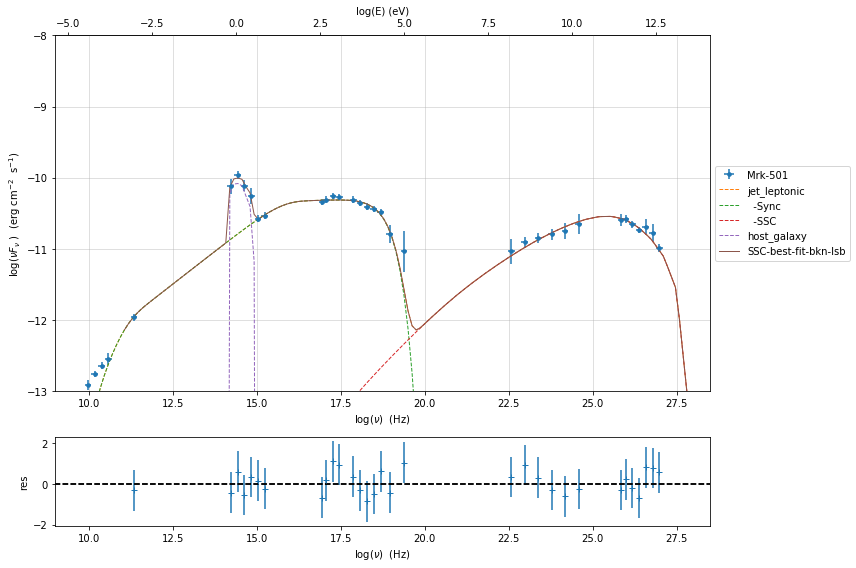

In [19]:
%matplotlib inline
fit_model_lsb_bkn.set_nu_grid(1E6,1E30,200)
fit_model_lsb_bkn.eval()
p2=fit_model_lsb_bkn.plot_model(sed_data=sed_data)
p2.rescale(y_min=-13,x_min=9,x_max=28.5)

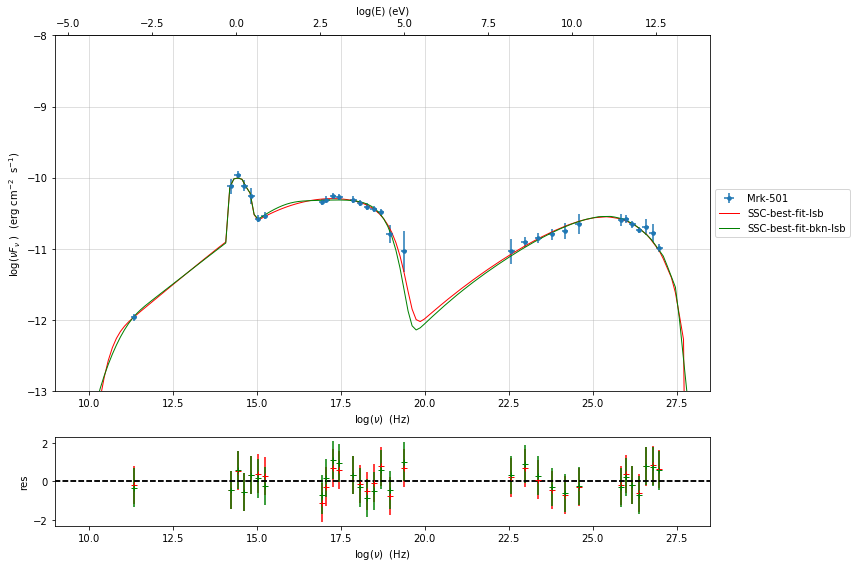

In [20]:
%matplotlib inline
from jetset.plot_sedfit import PlotSED
fit_model_lsb_bkn.set_nu_grid(1E6,1E30,200)
fit_model_lsb_bkn.eval()
p2=PlotSED()
p2.add_data_plot(sed_data,fit_range=[ 11,29])
p2.add_model_plot(fit_model_lsb,color='red')
p2.add_residual_plot(fit_model_lsb,sed_data,fit_range=[ 11,29],color='red')
p2.add_model_plot(fit_model_lsb_bkn,color='green')
p2.add_residual_plot(fit_model_lsb_bkn,sed_data,fit_range=[ 11,29],color='green')
p2.rescale(y_min=-13,x_min=9,x_max=28.5)

# MCMC

In [21]:
from jetset.mcmc import McmcSampler

We  used a flat prior  centered on the best fit value.   Setting `bound=5.0` and `bound_rel=True` means that:
    
1) the prior interval will be defined as  [best_fit_val - delta_m , best_fit_val + delta_p] 

2) with delta_p=delta_m=best_fit_val*bound

If we set `bound_rel=False` then   delta_p = delta_m = best_fit_err*bound

It is possible to define asymmetric boundaries e.g. `bound=[2.0,5.0]` meaning that 

1) for `bound_rel=True` 

     delta_p = best_fit_val*bound[1]

     delta_m =b est_fit_val*bound[0]

2)  for `bound_rel=False` 

    delta_p = best_fit_err*bound[1]

    delta_m = best_fit_err*bound[0]

In the next release a more flexible prior interface will be added, including different type of priors

Given the large parameter space, we select a sub sample of parameters using the `use_labels_dict`. If we do not pass the 'use_labels_dict' the full set of free parameters will be used


In [31]:
mcmc=McmcSampler(model_minimizer_lsb)
labels=['N','B','beam_obj','s','gamma0_log_parab']
model_name='jet_leptonic'
use_labels_dict={model_name:labels}
mcmc.run_sampler(nwalkers=128,burnin=10,steps=50,bound=5.0,bound_rel=True,threads=None,walker_start_bound=0.005,use_labels_dict=use_labels_dict)


mcmc run starting


100%|██████████| 50/50 [06:09<00:00,  7.39s/it]

mcmc run done, with 1 threads took 376.81 seconds


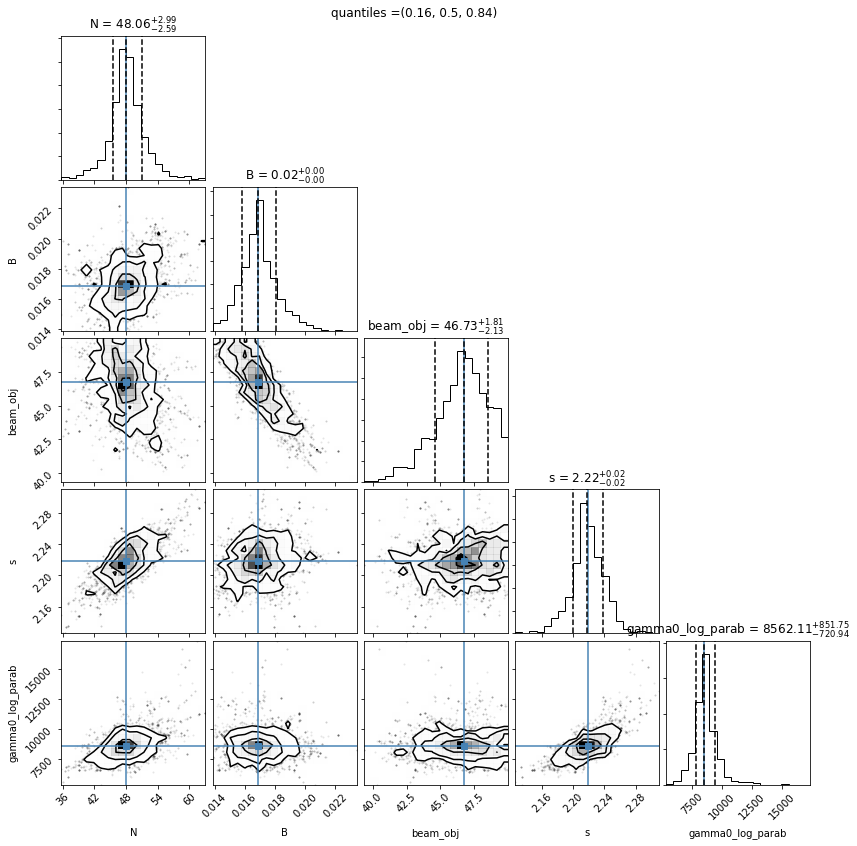

In [23]:
f=mcmc.corner_plot()


In [24]:
mcmc.save('test_run_mcmc.pkl')

In [25]:
ms=McmcSampler.load('test_run_mcmc.pkl')


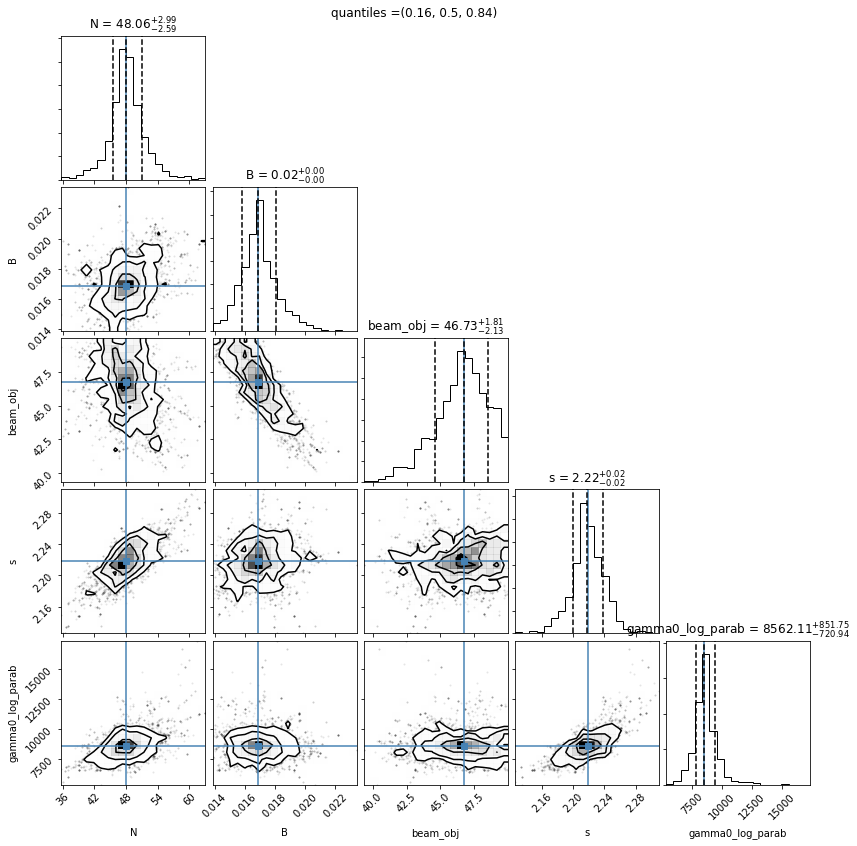

In [26]:
p=mcmc.corner_plot()


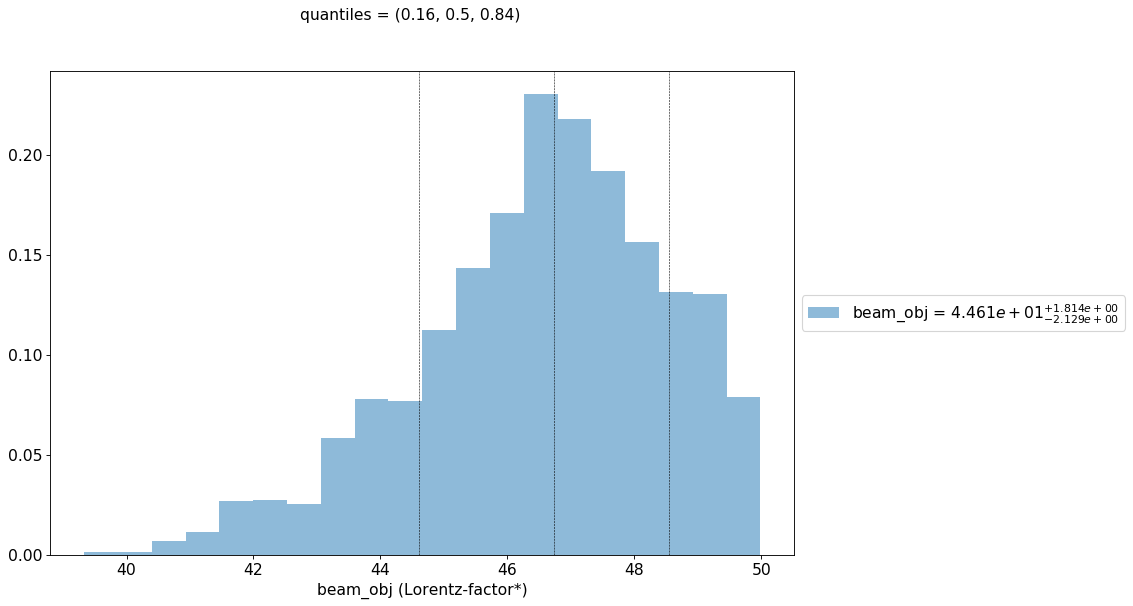

In [27]:
p=ms.plot_par('beam_obj',log_plot=False)


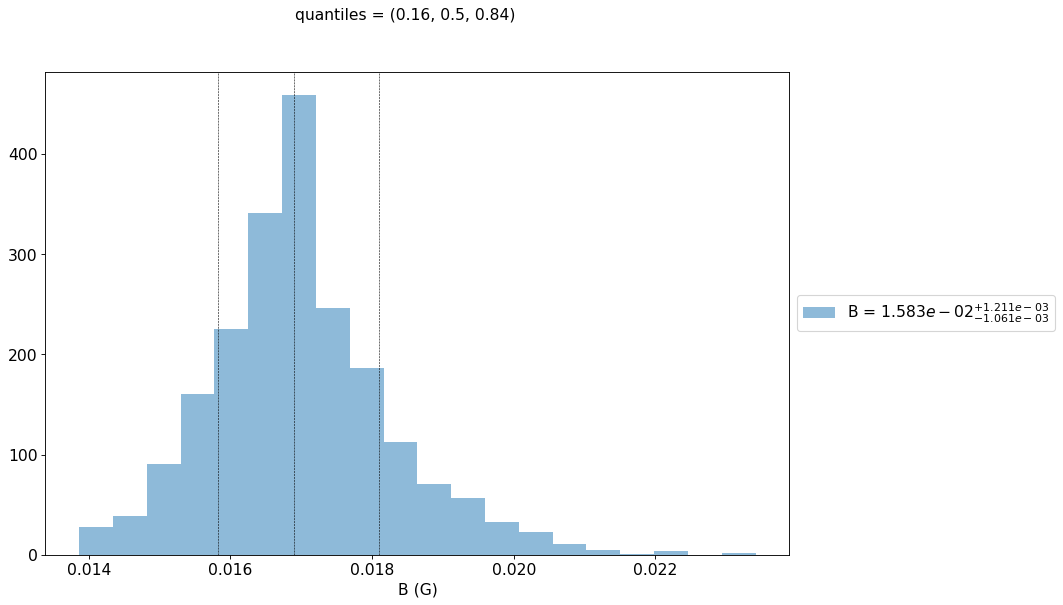

In [28]:
p=ms.plot_par('B',log_plot=False)


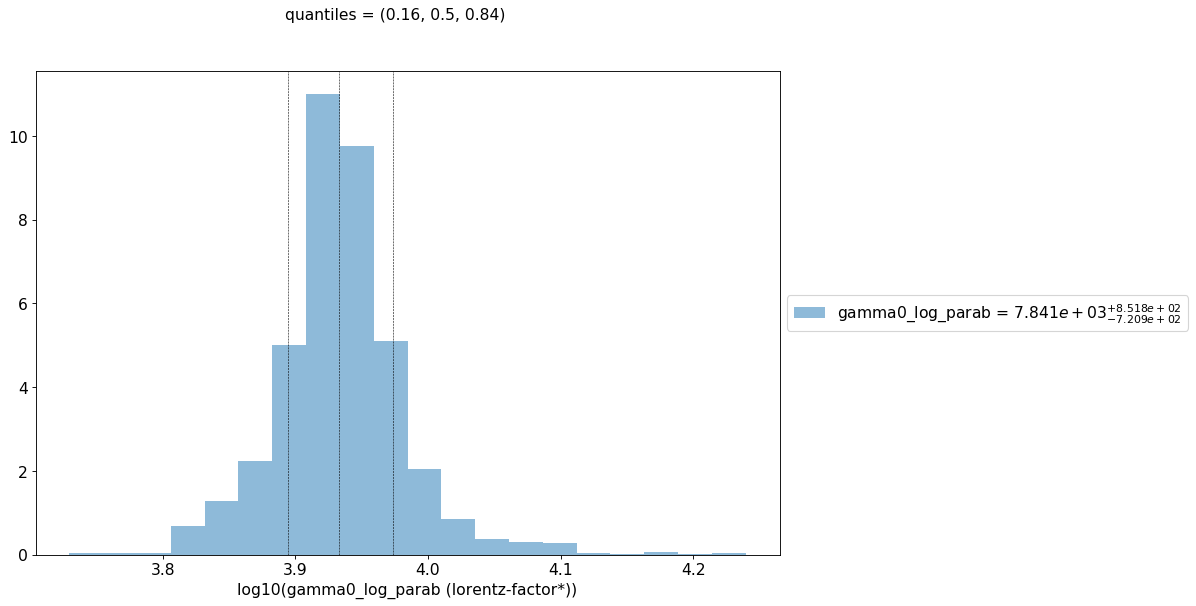

In [29]:
f=ms.plot_par('gamma0_log_parab',log_plot=True)
